In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation

In [4]:
def draw_marker(pose, ax):
    rot = pose[:3, :3]
    trans = pose[:3, 3]
    #X-axis
    x_axis = np.array([[0.1], [0], [0]])
    x_axis = rot @ x_axis
    ax.quiver(trans[0],trans[1],trans[2],x_axis[0,0],x_axis[1,0],x_axis[2,0],color='r',arrow_length_ratio=0.1)

    #Y-axis
    y_axis = np.array([[0], [0.1], [0]])
    y_axis = rot @ y_axis
    ax.quiver(trans[0],trans[1],trans[2],y_axis[0,0],y_axis[1,0],y_axis[2,0],color='b',arrow_length_ratio=0.1)

    #Z-axis
    z_axis = np.array([[0], [0], [0.1]])
    z_axis = rot @ z_axis
    ax.quiver(trans[0],trans[1],trans[2],z_axis[0,0],z_axis[1,0],z_axis[2,0],color='g',arrow_length_ratio=0.1)

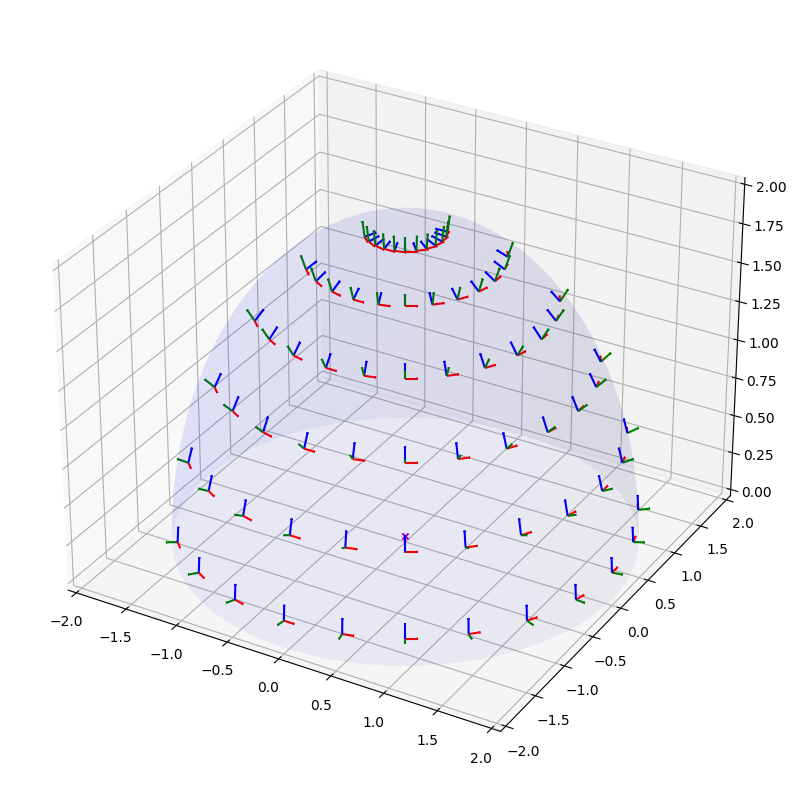

In [41]:
# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set figure size
fig.set_size_inches(10, 10)

#Set the axis limits
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([0, 2])

#Mark orgin with magenta cross
ax.scatter(0, 0, 0, c='m', marker='x')

r = 2
for i in range(10, 90, 15):
    for j in range(-45, 135, 15):
        transform_matrix = np.eye(4)

        # Translation
        transform_matrix[:3, 3] = [0, 0, r]

        # Rotation
        rot = Rotation.from_euler('xyz', [i, 0, j], degrees=True)
        rot_matrix = np.eye(4)
        rot_matrix[:3, :3] = rot.as_matrix()
        transform_matrix = np.matmul(rot_matrix, transform_matrix)

        draw_marker(transform_matrix, ax)

#Draw hemisphere surface
        
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi/2, 100)
x = r * np.outer(np.cos(u), np.sin(v))
y = r * np.outer(np.sin(u), np.sin(v))
z = r * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='b', alpha=0.05)
        

plt.show()

